In [894]:
# Load libraries
import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
import matplotlib.pyplot as plt
from IPython.display import Image  
import pydotplus


In [895]:
col_names = [ 'buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# load dataset
data = pd.read_excel("car.xlsx", header=None, names=col_names,usecols="B:H") #only take from second colun

data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,buying,maint,doors,persons,lug_boot,safety,class
1,vhigh,vhigh,2,2,small,low,unacc
2,vhigh,vhigh,2,2,small,med,unacc
3,vhigh,vhigh,2,2,small,high,unacc
4,vhigh,vhigh,2,2,med,low,unacc


In [896]:
# label encode the categorical values and convert them to numbers 
le = LabelEncoder()

for i in data.columns:
    data[i]=le.fit_transform(data[i])
    
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,2,4,3,1,3,1
1,4,4,0,0,3,1,3
2,4,4,0,0,3,2,3
3,4,4,0,0,3,0,3
4,4,4,0,0,2,1,3


In [897]:
feature_cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
X = data[feature_cols] # Features
y = data['class'] # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

Create desicion tree using data from dataset with max depth is 5

In [898]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy of ID3:",metrics.accuracy_score(y_test, y_pred))

Accuracy of ID3: 0.8747591522157996


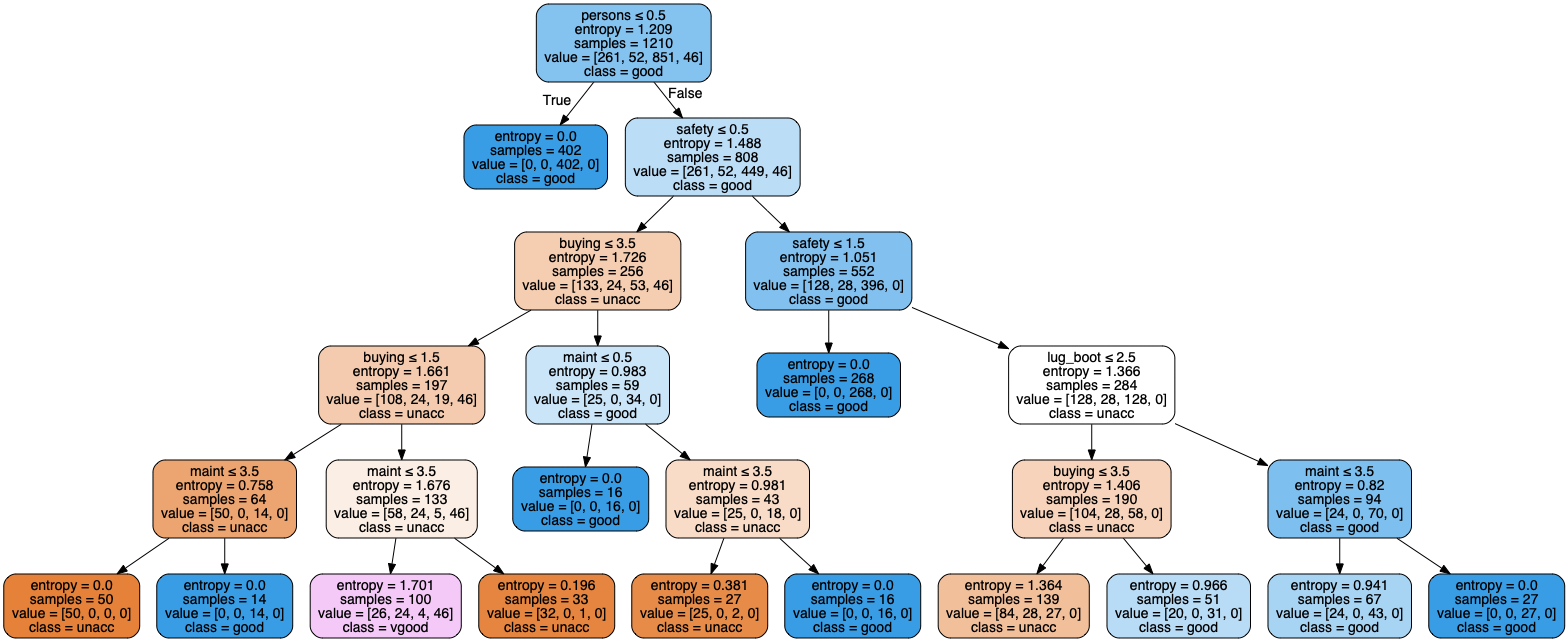

In [899]:
#create image for desision tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['unacc','acc','good','vgood'])
                
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('id3-dep5.png')
Image(graph.create_png())

Construct Bagging Decision Tree with a maximum depth of five and increase number of tree from 50 to 175, jump 20. Using entropy criterion

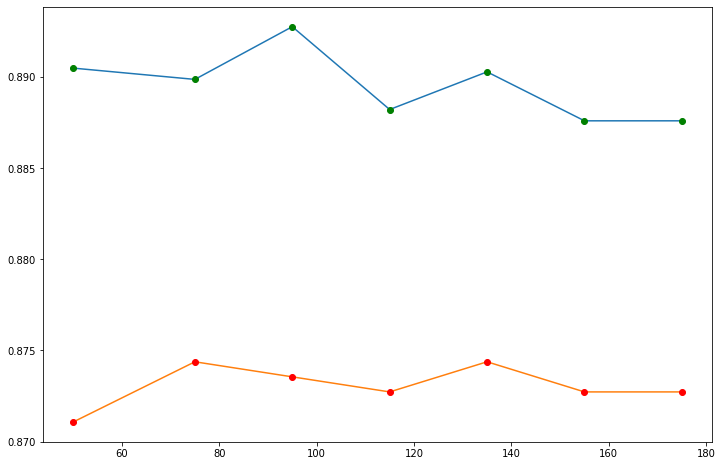

In [900]:
# create model for Bagging Decision Tree
bc_model = BaggingClassifier(base_estimator=DecisionTreeClassifier (criterion="entropy", max_depth=5), random_state=51 ,n_jobs=-1)
param_range=[50,75,95,115,135,155,175] #number of tree
curve= model_selection.validation_curve(bc_model,X_train,y_train,param_name='n_estimators',
    param_range=param_range,n_jobs=-1) 
train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(12,8))
train = plt.plot(param_range,train_score,param_range,train_score,'go')#green dot
test = plt.plot(param_range,test_score,param_range,test_score,'ro')#red dot
plt.xticks=param_range

Conclusion: This bagging model with 5 max depth in tree show how "weak learner" it is, the ratio change in accuracy is very low when increasing in number of tree input. This is because all the bag trees will look similar to each other

Create Random Forest Decision Tree with a maximum depth of five and increase number of tree from 50 to 175, jump 20. Using entropy criterion 

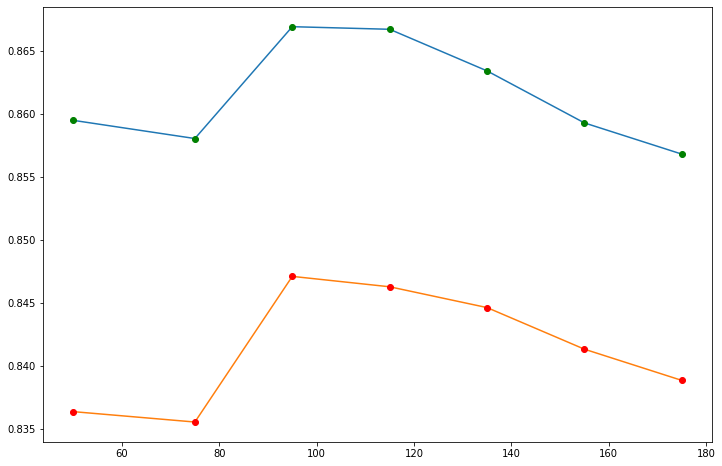

In [901]:
# create model for Random Forest Decision Tree
rfc_model=RandomForestClassifier(n_jobs=-1,random_state=51, max_depth=5, criterion="entropy")
param_range=[50,75,95,115,135,155,175] #number of tree
curve= model_selection.validation_curve(rfc_model,X_train,y_train,param_name='n_estimators',param_range=param_range,n_jobs=-1)
train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(12,8))
train = plt.plot(param_range,train_score,param_range,train_score,'go')
test = plt.plot(param_range,test_score,param_range,test_score,'ro')
plt.xticks=param_range


Conclusion: The accuracy of model trainning increase from around 75 to 95 for number of tree, and then reach its maximum before go down and become overfitting. This show that radom forest model better than bagging model